# Regression (회귀)

## K-Nearest Neighbors 회귀

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

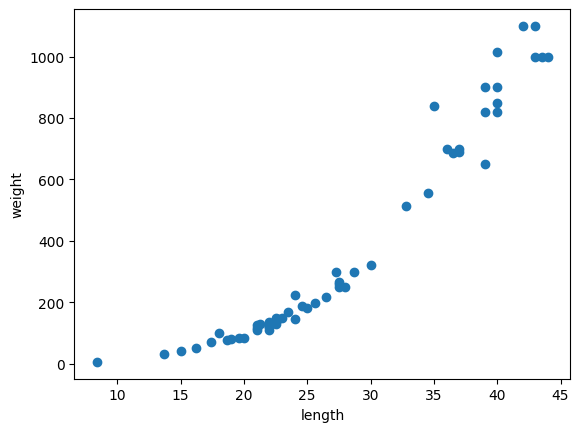

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 지수함수의 형태

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

# reshape(-1, 1) 벡터 -> 매트릭스로 바꿔줌
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train.shape

(42, 1)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.992809406101064

In [19]:
from sklearn.metrics import mean_absolute_error # 절대값 오차 평균

test_prediction = knr.predict(X_test)
#                      예측 무게,    실제 무게
mean_absolute_error(test_prediction, y_test)


19.157142857142862

In [21]:
knr.score(X_train, y_train)

0.9698823289099254

- 과대 적합 (Overfitting)
    - 훈련 셋 점수 >> 테스트 셋 점수

- 과소 적합 (Underfitting)
    - 훈련 셋 점수 << 테스트 셋 점수
    - 그냥 점수가 낮음

In [24]:
# 과소 적합
print(knr.score(X_train, y_train), knr.score(X_test, y_test))

knr.n_neighbors = 3
print(knr.score(X_train, y_train), knr.score(X_test, y_test))


0.9804899950518966 0.9746459963987609
0.9804899950518966 0.9746459963987609


[1033.33333333]


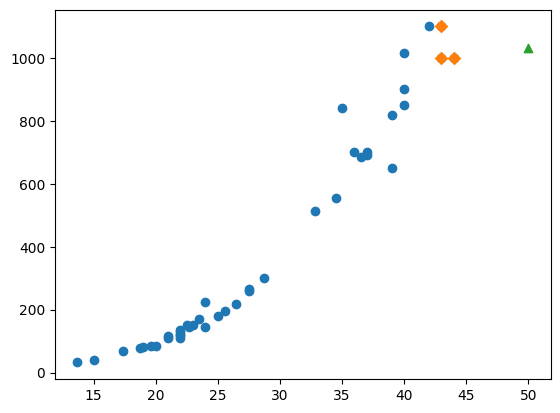

In [ ]:
print(knr.predict([[50]]))
distances, indexes = knr.kneighbors([[50]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.scatter(50, 1033, marker='^')

# knr의 한계: 범위 밖에 있는 애들은 예측할 수 없음..!

## 선형 회귀 (Linear Regression)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

# 기울기, 절편
print(lr.coef_, lr.intercept_)
# 점수 -> train > test, but 둘다 낮아서 과소적합
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# 예측
lr.predict([[50]])



[39.01714496] -709.0186449535474
0.9398463339976041
0.824750312331356


array([1241.83860323])

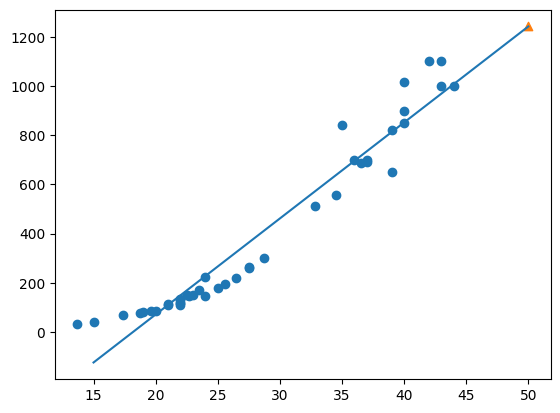

In [34]:
plt.scatter(X_train, y_train)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.show()

## 다항 회귀
- y = a·x² + b·x + c   

In [37]:
X_train_poly = np.column_stack((X_train **2, X_train))
X_test_poly = np.column_stack((X_test **2, X_test))

In [45]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.coef_, lr.intercept_) # y = 1.01x^2 - 21.5x + 116

print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

lr.predict([[50**2, 50]])

[  1.01433211 -21.55792498] 116.05021078278259
0.9706807451768623
0.9775935108325121


array([1573.98423528])

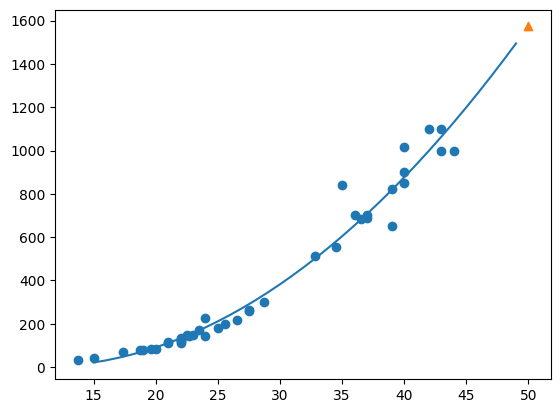

In [44]:
point = np.arange(15, 50)
plt.scatter(X_train, y_train)

# 학습한 다항모델의 곡선
plt.plot(point, 1.014*point**2 - 21.55*point + 116.05)
plt.scatter(50, 1573, marker='^')
plt.show()

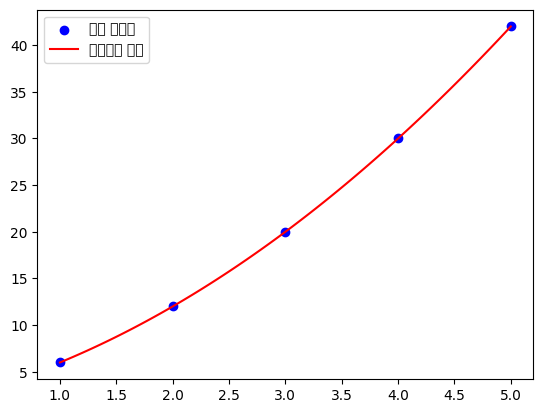

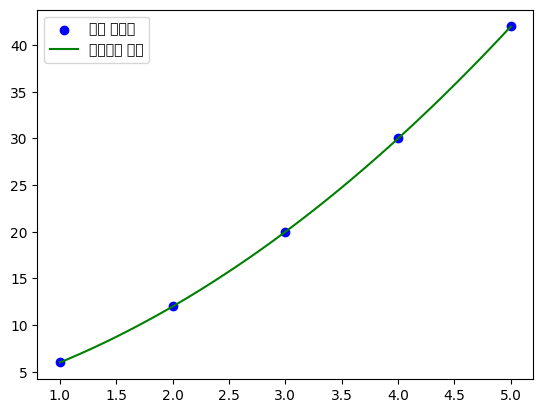

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = x**2 + 3*x + 2   # y = x² + 3x + 2

# 다항 특징 만들기 (2차항까지)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# 모델 학습
model = LinearRegression()
model.fit(x_poly, y)

# 예측
x_range = np.linspace(1, 5, 100).reshape(-1, 1)
y_pred = model.predict(poly.transform(x_range))

# 시각화
plt.scatter(x, y, color="blue", label="실제 데이터")
plt.plot(x_range, y_pred, color="red", label="다항회귀 예측")
plt.legend()
plt.show()

# 독립변수 2개로 구성: x와 x^2
X_multi = np.column_stack((x, x**2))   # [x, x²]
y = x**2 + 3*x + 2

# 모델 학습
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

# 예측
X_range_multi = np.column_stack((x_range, x_range**2))
y_pred_multi = model_multi.predict(X_range_multi)

# 시각화
plt.scatter(x, y, color="blue", label="실제 데이터")
plt.plot(x_range, y_pred_multi, color="green", label="다중회귀 예측")
plt.legend()
plt.show()